In [1]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [52]:
def mean_plot(files,titles,plot_title=None,measurement=None):
    if measurement == None:
        measurement = 'Train_AverageReturn'
    color_list = ['darkorange','darkblue','green','slategrey','crimson','lightseagreen','black']
    rewards_out = []
    for category in files:
        first_file = True
        rewards = []
        steps = []
        prev_len = 0
        
        for file in category:

            ea = event_accumulator.EventAccumulator(file)
            ea.Reload()
            print(file)
            
            step_len = len(ea.Scalars(measurement))
                
            for i in range(step_len):
                if first_file:
                    rewards.append(ea.Scalars(measurement)[i][2])
                    steps.append(ea.Scalars(measurement)[i][1])
                else: 
                    rewards[i] += ea.Scalars(measurement)[i][2]

                rewards = [np.mean(rewards[i]) for i in range(len(rewards))]

            first_file=False
            prev_len = step_len
            
        rewards_out.append(rewards)
                
            
    print([len(rewards_out[i]) for i in range(len(rewards_out))])
    fig = plt.figure(figsize=(8,4))
    
    ax = plt.subplot(111)
        
    for k in range(len(rewards_out)):
        line, = ax.plot(steps,rewards_out[k],label=titles[k],linewidth=3,color=color_list[k])
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=len(rewards))

    if plot_title != None:
        plt.title(plot_title)
    
    plt.show()

# Q 1.1.

./data/hw5_expl_q1_env2_rnd_PointmassMedium-v0_10-11-2022_20-49-12
./data/hw5_expl_q1_env2_random_PointmassMedium-v0_11-11-2022_10-52-46
[50, 50]


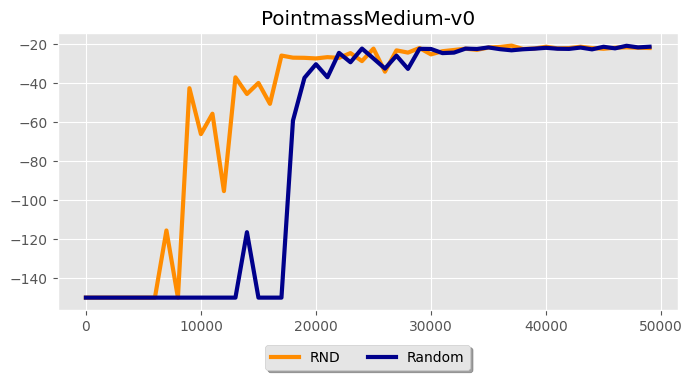

In [54]:
#Easy environment
mean_plot([['./data/hw5_expl_q1_env2_rnd_PointmassMedium-v0_10-11-2022_20-49-12'],['./data/hw5_expl_q1_env2_random_PointmassMedium-v0_11-11-2022_10-52-46']],['RND','Random'],'PointmassMedium-v0',measurement='Eval_AverageReturn')

./data/hw5_expl_q1_env1_rnd_PointmassEasy-v0_10-11-2022_19-55-18
./data/hw5_expl_q1_env1_random_PointmassEasy-v0_21-11-2022_09-37-32
[50, 50]


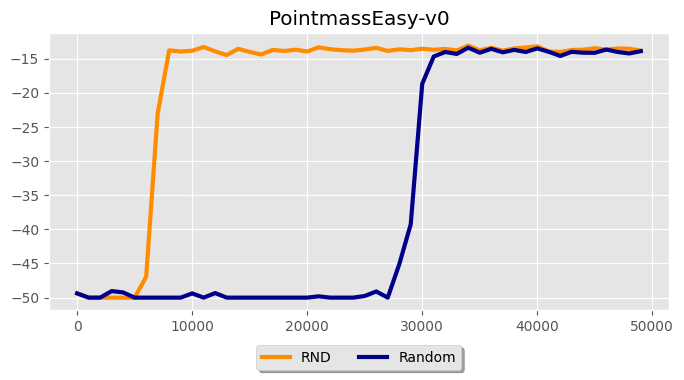

In [56]:
mean_plot([['./data/hw5_expl_q1_env1_rnd_PointmassEasy-v0_10-11-2022_19-55-18'],['./data/hw5_expl_q1_env1_random_PointmassEasy-v0_21-11-2022_09-37-32']],['RND','Random'],'PointmassEasy-v0',measurement='Eval_AverageReturn')

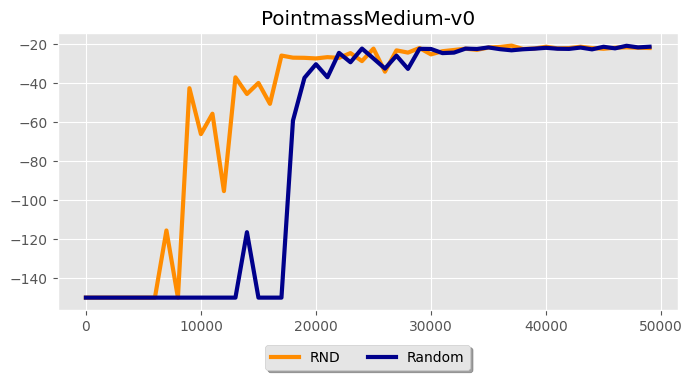

In [18]:
mean_plot([['./data/hw5_expl_q1_env2_rnd_PointmassMedium-v0_10-11-2022_20-49-12'],['./data/hw5_expl_q1_env2_random_PointmassMedium-v0_11-11-2022_10-52-46']],['RND','Random'],'PointmassMedium-v0',measurement='Eval_AverageReturn')

# Q 1.2

./data/hw5_expl_q1_alg_med_PointmassMedium-v0_21-11-2022_23-20-14
./data/hw5_expl_q1_alg_hard_PointmassHard-v0_21-11-2022_23-20-38
[50, 50]


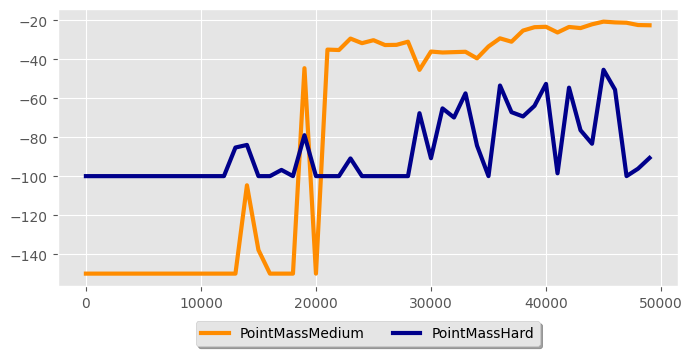

In [58]:
mean_plot([['./data/hw5_expl_q1_alg_med_PointmassMedium-v0_21-11-2022_23-20-14'],['./data/hw5_expl_q1_alg_hard_PointmassHard-v0_21-11-2022_23-20-38']],['PointMassMedium','PointMassHard'],'',measurement='Eval_AverageReturn')

# Q 2.1

./data/hw5_expl_q2_cql_PointmassMedium-v0_11-11-2022_13-14-31
./data/hw5_expl_q2_dqn_PointmassMedium-v0_11-11-2022_12-03-56


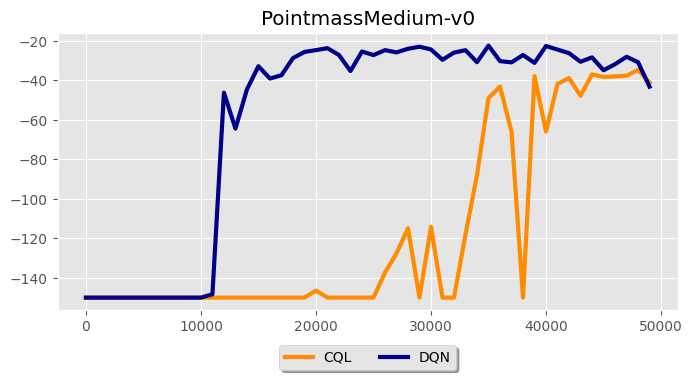

In [42]:
mean_plot([['./data/hw5_expl_q2_cql_PointmassMedium-v0_11-11-2022_13-14-31'],['./data/hw5_expl_q2_dqn_PointmassMedium-v0_11-11-2022_12-03-56']],['CQL','DQN'],'PointmassMedium-v0',measurement='Eval_AverageReturn')

# Q 2.2

./data/hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_15-11-2022_10-52-28
./data/hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_15-11-2022_11-32-24


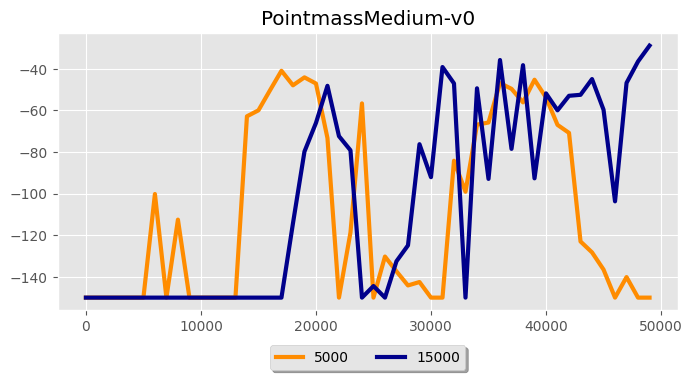

In [43]:
# CQL
mean_plot([['./data/hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_15-11-2022_10-52-28'],['./data/hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_15-11-2022_11-32-24']],['5000','15000'],'PointmassMedium-v0',measurement='Eval_AverageReturn')

./data/hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_15-11-2022_12-09-20
./data/hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_15-11-2022_12-36-35


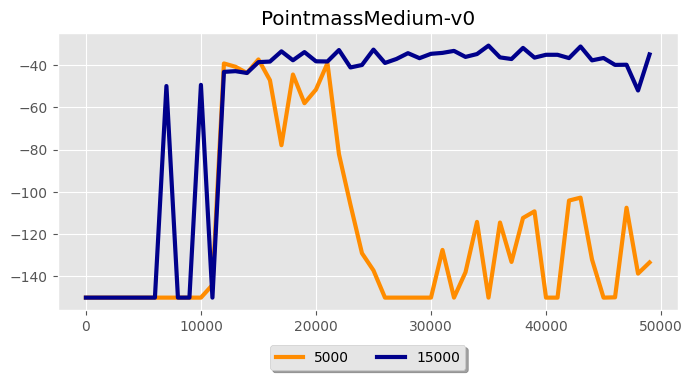

In [44]:
# DQN - Medium
mean_plot([['./data/hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_15-11-2022_12-09-20'],['./data/hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_15-11-2022_12-36-35']],['5000','15000'],'PointmassMedium-v0',measurement='Eval_AverageReturn')

./data/hw5_expl_q2_cql_numsteps_5000_PointmassHard-v0_15-11-2022_14-38-58
./data/hw5_expl_q2_cql_numsteps_15000_PointmassHard-v0_15-11-2022_15-08-32


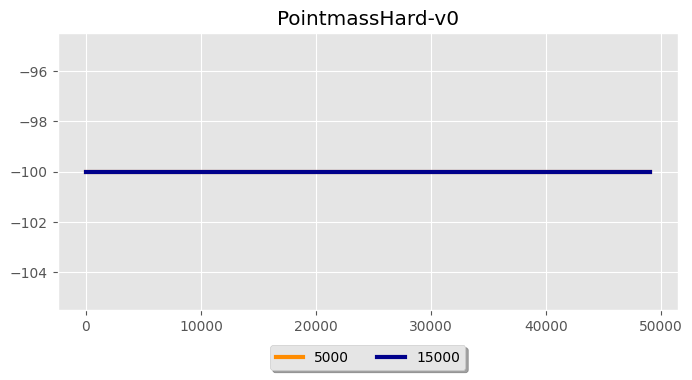

In [45]:
# CQL Hard
mean_plot([['./data/hw5_expl_q2_cql_numsteps_5000_PointmassHard-v0_15-11-2022_14-38-58'],['./data/hw5_expl_q2_cql_numsteps_15000_PointmassHard-v0_15-11-2022_15-08-32']],['5000','15000'],'PointmassHard-v0',measurement='Eval_AverageReturn')

./data/hw5_expl_q2_dqn_numsteps_5000_PointmassHard-v0_15-11-2022_13-14-22
./data/hw5_expl_q2_dqn_numsteps_15000_PointmassHard-v0_15-11-2022_13-58-58


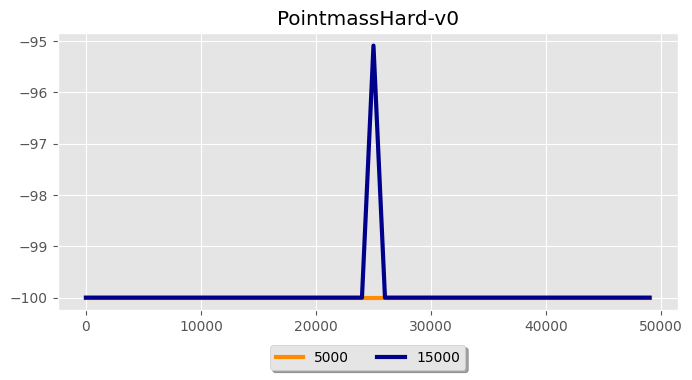

In [46]:
# DQN Hard
mean_plot([['./data/hw5_expl_q2_dqn_numsteps_5000_PointmassHard-v0_15-11-2022_13-14-22'],['./data/hw5_expl_q2_dqn_numsteps_15000_PointmassHard-v0_15-11-2022_13-58-58']],['5000','15000'],'PointmassHard-v0',measurement='Eval_AverageReturn')

# Q 3.1

./data/hw5_expl_q3_medium_cql_PointmassMedium-v0_15-11-2022_20-43-43
./data/hw5_expl_q3_medium_dqn_PointmassMedium-v0_15-11-2022_20-13-03


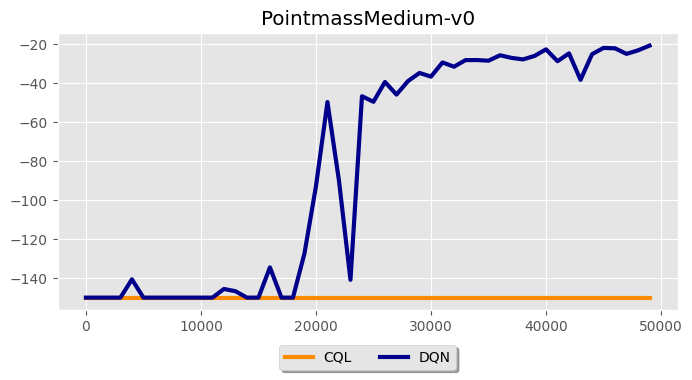

In [47]:
mean_plot([['./data/hw5_expl_q3_medium_cql_PointmassMedium-v0_15-11-2022_20-43-43'],['./data/hw5_expl_q3_medium_dqn_PointmassMedium-v0_15-11-2022_20-13-03']],['CQL','DQN'],'PointmassMedium-v0',measurement='Eval_AverageReturn')

./data/hw5_expl_q3_hard_cql_PointmassHard-v0_15-11-2022_21-40-18
./data/hw5_expl_q3_hard_dqn_PointmassHard-v0_15-11-2022_21-09-49


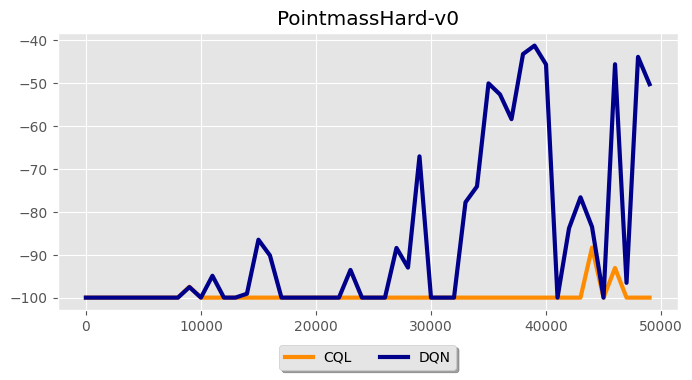

In [48]:
mean_plot([['./data/hw5_expl_q3_hard_cql_PointmassHard-v0_15-11-2022_21-40-18'],['./data/hw5_expl_q3_hard_dqn_PointmassHard-v0_15-11-2022_21-09-49']],['CQL','DQN'],'PointmassHard-v0',measurement='Eval_AverageReturn')

# Q 4

In [34]:
mean_plot([['./data/hw5_expl_q4_awac_easy_supervised_lam0.1_PointmassEasy-v0_16-11-2022_17-10-19'],['./data/hw5_expl_q4_awac_easy_supervised_lam1_PointmassEasy-v0_16-11-2022_17-34-19'],['./data/hw5_expl_q4_awac_easy_supervised_lam2_PointmassEasy-v0_16-11-2022_18-44-23'],['./data/hw5_expl_q4_awac_easy_supervised_lam10_PointmassEasy-v0_16-11-2022_18-44-32'],['./data/hw5_expl_q4_awac_easy_supervised_lam20_PointmassEasy-v0_16-11-2022_19-23-33'],['./data/hw5_expl_q4_awac_easy_supervised_lam50_PointmassEasy-v0_16-11-2022_20-30-40']],['0.1','1','2','10','20','50'],'PointmassEasy-v0',measurement='Eval_AverageReturn')

./data/hw5_expl_q4_awac_easy_supervised_lam0.1_PointmassEasy-v0_16-11-2022_17-10-19
./data/hw5_expl_q4_awac_easy_supervised_lam1_PointmassEasy-v0_16-11-2022_17-34-19
./data/hw5_expl_q4_awac_easy_supervised_lam2_PointmassEasy-v0_16-11-2022_18-44-23


KeyError: 'Key Eval_AverageReturn was not found in Reservoir'

In [40]:
ea = event_accumulator.EventAccumulator('./data/hw5_expl_q4_awac_easy_supervised_lam50_PointmassEasy-v0_16-11-2022_20-30-40')
ea.Reload()
print(ea.Tags())

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Train_EnvstepsSoFar', 'TimeSinceStart', 'Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Buffer_size', 'Train_AverageReturn', 'Exploration_Critic_Loss', 'Exploitation_Critic_Loss', 'Exploration_Model_Loss', 'Actor_Loss', 'Train_BestReturn'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [41]:
ea.Scalars('Train_AverageReturn')

[ScalarEvent(wall_time=1668659469.003386, step=1001, value=-50.0),
 ScalarEvent(wall_time=1668659487.3610907, step=2001, value=-49.82500076293945),
 ScalarEvent(wall_time=1668659550.1932921, step=3001, value=-49.46666717529297),
 ScalarEvent(wall_time=1668659614.949283, step=4001, value=-48.0361442565918),
 ScalarEvent(wall_time=1668659684.5597034, step=5001, value=-37.470001220703125),
 ScalarEvent(wall_time=1668659757.1073623, step=6001, value=-22.56999969482422),
 ScalarEvent(wall_time=1668659835.0268111, step=7001, value=-17.950000762939453),
 ScalarEvent(wall_time=1668659911.358899, step=8001, value=-17.90999984741211),
 ScalarEvent(wall_time=1668659987.6699092, step=9001, value=-17.350000381469727),
 ScalarEvent(wall_time=1668660065.0650563, step=10001, value=-17.100000381469727),
 ScalarEvent(wall_time=1668660141.002737, step=11001, value=-17.649999618530273),
 ScalarEvent(wall_time=1668660216.3380196, step=12001, value=-17.600000381469727),
 ScalarEvent(wall_time=1668660293.934

./data/hw5_expl_q4_awac_easy_unsupervised_lam0.1_PointmassEasy-v0_16-11-2022_11-28-19
./data/hw5_expl_q4_awac_easy_unsupervised_lam1_PointmassEasy-v0_16-11-2022_11-33-19
./data/hw5_expl_q4_awac_easy_unsupervised_lam2_PointmassEasy-v0_16-11-2022_12-53-34
./data/hw5_expl_q4_awac_easy_unsupervised_lam10_PointmassEasy-v0_16-11-2022_14-04-50
./data/hw5_expl_q4_awac_easy_unsupervised_lam20_PointmassEasy-v0_16-11-2022_14-08-41
./data/hw5_expl_q4_awac_easy_unsupervised_lam50_PointmassEasy-v0_16-11-2022_15-24-19
[4, 50, 44, 4, 38, 50]


ValueError: x and y must have same first dimension, but have shapes (50,) and (4,)

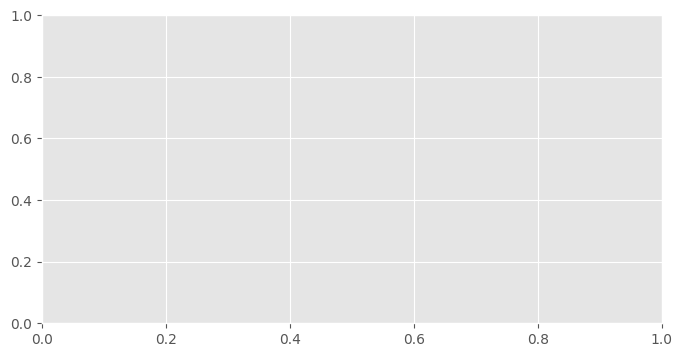

In [53]:
#unsupervised
mean_plot([['./data/hw5_expl_q4_awac_easy_unsupervised_lam0.1_PointmassEasy-v0_16-11-2022_11-28-19'],['./data/hw5_expl_q4_awac_easy_unsupervised_lam1_PointmassEasy-v0_16-11-2022_11-33-19'],['./data/hw5_expl_q4_awac_easy_unsupervised_lam2_PointmassEasy-v0_16-11-2022_12-53-34'],['./data/hw5_expl_q4_awac_easy_unsupervised_lam10_PointmassEasy-v0_16-11-2022_14-04-50'],['./data/hw5_expl_q4_awac_easy_unsupervised_lam20_PointmassEasy-v0_16-11-2022_14-08-41'],['./data/hw5_expl_q4_awac_easy_unsupervised_lam50_PointmassEasy-v0_16-11-2022_15-24-19']],['0.1','1','2','10','20','50'],'PointmassEasy-v0',measurement='Eval_AverageReturn')

In [ ]:
python cs285/scripts/run_hw5_awac.py --env_name PointmassEasy-v0 --exp_name q4_awac_easy_unsupervised_lam0.1 --use_rnd --num_exploration_steps=20000 --unsupervised_exploration --awac_lambda=0.1